In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score

In [2]:
!pip install openpyxl

In [3]:
up, down = True, False

In [4]:
np.set_printoptions(precision=3)

pd.set_option("expand_frame_repr", True)
pd.set_option("colheader_justify", "right")

pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 75)

pd.set_option("display.precision", 4)

In [5]:
# read in file 
nutrients_dataset = "Food And Nutrient Database For Dietary Studies/2021-2023 FNDDS At A Glance - FNDDS Nutrient Values.xlsx"  # Replace with your file path
df = pd.read_excel(nutrients_dataset, sheet_name=0, header=1)

liquid_keywords = ['water', 'juice', 'milk', 'tea', 'coffee', 'soup', 'broth', 'smoothie', 'sauce']
water_threshold = 90
liquid_categories = ['Beverages', 'Water', 'Juices', 'Alcoholic Beverages', 'Soups, Sauces, and Gravies']

# list of key words to check in the WWEIA Category description
keywords = ['milk', 'dips', 'spread', 'cream', 'butter', 'sauces', 'dressing',
            'ice cream', 'yogurt', 'formula', 'drinks', 'liquor', 'tea', 'coffee',
            'milk', 'water', 'juice', 'soups', 'beverages', 'wine', 'beer']

# check for keywords and make a new column identifying if an entry is a liquid
df['Is Liquid'] = df['WWEIA Category description'].apply(lambda x: 1 if any(keyword in str(x).lower() for keyword in keywords) else 0)

#Drop all solids from the dataset to create a dataset of only liquids.  The new dataset is called df_liquid
df_liquid = df[df['Is Liquid'] == 1]
df_liquid.head()

,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Folic acid (mcg),"Folate, food (mcg)","Folate, DFE (mcg_DFE)","Folate, total (mcg)","Choline, total (mg)",Vitamin B-12 (mcg),"Vitamin B-12, added\n(mcg)",Vitamin C (mg),Vitamin D (D2 + D3) (mcg),Vitamin E (alpha-tocopherol) (mg),"Vitamin E, added\n(mg)",Vitamin K (phylloquinone) (mcg),Calcium (mg),Phosphorus (mg),Magnesium (mg),Iron\n(mg),Zinc\n(mg),Copper (mg),Selenium (mcg),Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g),Is Liquid
0,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,1.249,0.458,0.070,9,57,58,0,4,0,0,0,0.057,0.137,0.110,0.061,0,1,1,1,17.9,0.56,0.0,0.1,1.1,0.03,0.0,0.2,125,103,12,0.0,0.43,0.001,1.9,156,39,0,0,0.0,0.046,0.036,0.023,0.056,0.065,0.204,0.576,0.208,0.032,0.465,0.002,0.0,0.074,0.008,0.0,0.003,0.000,0.001,0.0,88.92,1
1,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0.0,3.20,1.860,0.688,0.108,12,31,32,0,7,0,0,0,0.056,0.138,0.105,0.061,0,0,0,0,17.8,0.54,0.0,0.0,1.1,0.05,0.0,0.3,123,101,12,0.0,0.42,0.001,1.9,150,38,0,0,0.0,0.067,0.054,0.034,0.084,0.097,0.303,0.857,0.309,0.047,0.694,0.004,0.0,0.115,0.013,0.0,0.004,0.001,0.002,0.0,88.10,1
2,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.90,4.89,0.0,1.90,1.110,0.400,0.058,8,83,83,0,3,0,0,0,0.059,0.137,0.112,0.061,0,2,2,2,18.2,0.55,0.0,0.2,1.1,0.03,0.0,0.2,126,103,12,0.0,0.43,0.001,1.8,159,39,0,0,0.0,0.041,0.032,0.021,0.049,0.058,0.181,0.512,0.184,0.029,0.410,0.002,0.0,0.061,0.007,0.0,0.003,0.000,0.001,0.0,89.10,1
3,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0.0,0.95,0.568,0.210,0.032,5,58,58,0,1,0,0,0,0.057,0.140,0.113,0.060,0,2,2,2,17.4,0.61,0.0,0.0,1.1,0.02,0.0,0.1,126,103,12,0.0,0.43,0.001,2.1,159,39,0,0,0.0,0.022,0.015,0.011,0.023,0.026,0.093,0.265,0.096,0.014,0.214,0.001,0.0,0.033,0.004,0.0,0.001,0.000,0.000,0.0,89.70,1
4,11113000,"Milk, fat free (skim)",1008,"Milk, nonfat",34,3.43,4.92,5.05,0.0,0.08,0.049,0.017,0.006,3,64,64,0,2,0,0,0,0.056,0.131,0.118,0.058,0,2,2,2,18.2,0.58,0.0,0.0,1.1,0.00,0.0,0.0,132,107,12,0.0,0.45,0.002,2.0,167,41,0,0,0.0,0.003,0.001,0.001,0.002,0.002,0.008,0.021,0.009,0.001,0.018,0.000,0.0,0.005,0.000,0.0,0.000,0.000,0.000,0.0,90.80,1


In [6]:
features = list(df_liquid.columns)

# removed '\n' from some columns for visualization purposes'
feat_list = ['Food code',
 'Main food description',
 'WWEIA Category number',
 'WWEIA Category description',
 'Energy (kcal)',
 'Protein (g)',
 'Carbohydrate (g)',
 'Sugars, total(g)',
 'Fiber, total dietary (g)',
 'Total Fat (g)',
 'Fatty acids, total saturated (g)',
 'Fatty acids, total monounsaturated (g)',
 'Fatty acids, total polyunsaturated (g)',
 'Cholesterol (mg)',
 'Retinol (mcg)',
 'Vitamin A, RAE (mcg_RAE)',
 'Carotene, alpha (mcg)',
 'Carotene, beta (mcg)',
 'Cryptoxanthin, beta (mcg)',
 'Lycopene (mcg)',
 'Lutein + zeaxanthin (mcg)',
 'Thiamin (mg)',
 'Riboflavin (mg)',
 'Niacin (mg)',
 'Vitamin B-6 (mg)',
 'Folic acid (mcg)',
 'Folate, food (mcg)',
 'Folate, DFE (mcg_DFE)',
 'Folate, total (mcg)',
 'Choline, total (mg)',
 'Vitamin B-12 (mcg)',
 'Vitamin B-12, added(mcg)',
 'Vitamin C (mg)',
 'Vitamin D (D2 + D3) (mcg)',
 'Vitamin E (alpha-tocopherol) (mg)',
 'Vitamin E, added(mg)',
 'Vitamin K (phylloquinone) (mcg)',
 'Calcium (mg)',
 'Phosphorus (mg)',
 'Magnesium (mg)',
 'Iron(mg)',
 'Zinc(mg)',
 'Copper (mg)',
 'Selenium (mcg)',
 'Potassium (mg)',
 'Sodium (mg)',
 'Caffeine (mg)',
 'Theobromine (mg)',
 'Alcohol (g)',
 '4:0(g)',
 '6:0(g)',
 '8:0(g)',
 '10:0(g)',
 '12:0(g)',
 '14:0(g)',
 '16:0(g)',
 '18:0(g)',
 '16:1(g)',
 '18:1(g)',
 '20:1(g)',
 '22:1(g)',
 '18:2(g)',
 '18:3(g)',
 '18:4(g)',
 '20:4(g)',
 '20:5 n-3(g)',
 '22:5 n-3(g)',
 '22:6 n-3(g)',
 'Water(g)',
 'Is Liquid']

len(features)

70

In [7]:
new_df = df_liquid.drop(columns = ['Food code', 'WWEIA Category number', 'WWEIA Category description'])
revised_df = new_df.groupby(by = ['Main food description']).mean()

revised_df.head()

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Folic acid (mcg),"Folate, food (mcg)","Folate, DFE (mcg_DFE)","Folate, total (mcg)","Choline, total (mg)",Vitamin B-12 (mcg),"Vitamin B-12, added\n(mcg)",Vitamin C (mg),Vitamin D (D2 + D3) (mcg),Vitamin E (alpha-tocopherol) (mg),"Vitamin E, added\n(mg)",Vitamin K (phylloquinone) (mcg),Calcium (mg),Phosphorus (mg),Magnesium (mg),Iron\n(mg),Zinc\n(mg),Copper (mg),Selenium (mcg),Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g),Is Liquid
Main food description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcoholic coffee drink,88,0.21,2.10,2.04,0.0,2.38,1.355,0.497,0.105,7,22,22,0,0,0,0,0,0.013,0.064,0.135,0.003,0,2,2,2,2.8,0.00,0.0,0.0,0.1,0.07,0.0,0.3,5,7,2,0.02,0.04,0.007,0.2,40,3,27,0,8.3,0.049,0.040,0.025,0.060,0.072,0.226,0.622,0.212,0.044,0.529,0.004,0.000,0.050,0.008,0.000,0.004,0.001,0.001,0.0,86.66,1
Alcoholic malt beverage,58,0.90,0.27,0.00,0.0,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0.030,0.090,1.100,0.090,0,18,18,18,10.1,0.02,0.0,0.0,0.0,0.00,0.0,0.0,8,32,12,0.03,0.01,0.008,0.6,62,4,0,0,7.7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,91.00,1
"Alcoholic malt beverage, sweetened",68,0.00,10.07,9.77,0.0,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,1,0.006,0.010,0.225,0.022,0,4,4,4,4.4,0.01,0.0,2.8,0.0,0.02,0.0,0.0,4,7,4,0.03,0.01,0.008,0.3,27,5,0,0,4.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,85.74,1
Alfredo sauce,150,2.12,1.77,0.90,0.0,15.00,8.523,3.125,0.622,44,136,137,0,6,0,0,0,0.011,0.074,0.022,0.013,0,2,2,2,6.4,0.07,0.0,0.2,0.5,0.30,0.0,1.3,66,50,4,0.02,0.29,0.008,2.7,39,552,0,0,0.0,0.318,0.256,0.159,0.373,0.440,1.395,3.932,1.355,0.251,3.250,0.026,0.001,0.363,0.055,0.001,0.023,0.004,0.008,0.0,79.37,1
Alfredo sauce with added vegetables,122,2.07,2.65,1.44,0.4,11.54,6.534,2.392,0.510,33,104,113,2,98,23,0,121,0.022,0.109,0.463,0.050,0,8,8,8,7.8,0.06,0.0,10.7,0.4,0.34,0.0,2.0,53,52,7,0.11,0.31,0.051,3.8,102,423,0,0,0.0,0.243,0.196,0.122,0.286,0.337,1.067,3.019,1.038,0.192,2.487,0.020,0.001,0.304,0.050,0.001,0.018,0.003,0.006,0.0,82.26,1


In [8]:
def scaled_nutrient_data(data):
    # function to drop unnecessary columns and scale data
    scaled_data = StandardScaler().fit_transform(data)
    
    return scaled_data

In [9]:
scaled_nutrient_data(revised_df)

array([[-0.196, -0.718, -0.795, ..., -0.292,  0.387,  0.   ],
       [-0.389, -0.462, -0.969, ..., -0.292,  0.595,  0.   ],
       [-0.325, -0.796, -0.041, ..., -0.292,  0.342,  0.   ],
       ...,
       [-0.151,  0.42 ,  0.118, ..., -0.292,  0.082,  0.   ],
       [-0.08 ,  0.442,  0.371, ..., -0.292, -0.049,  0.   ],
       [-0.261,  0.62 , -0.467, ..., -0.292,  0.32 ,  0.   ]])

In [10]:
def nutrient_PCA():
    # function to perform PCA on nutrient data
    
    scaled_data = scaled_nutrient_data(revised_df)
    pca = PCA(n_components = 20, random_state = 0).fit(scaled_data)
    
    return pca

In [11]:
# percentage of variance explained by the 20 Principal Components
print(nutrient_PCA().explained_variance_ratio_ * 100)
print(f'Total Explained Variance: {sum(nutrient_PCA().explained_variance_ratio_ * 100):.3f}%')

[20.411 14.488  8.783  5.575  4.691  4.342  3.448  3.267  2.855  2.537
  2.284  2.094  1.885  1.713  1.59   1.553  1.475  1.385  1.303  1.229]
Total Explained Variance: 86.908%


In [12]:
def plot_PCA(pca):
    # plot PCA Heatmap    
    feature_list = [x for x in feat_list if x not in ['Food code', 'WWEIA Category number', 'WWEIA Category description', 'Main food description']]
    
    pc_names = []
    
    for i in range(1, 21):
        pc_names.append(f'PC{i}')
    
    fig, ax = plt.subplots(figsize = ((15,20)))
    
    plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
    plt.xticks(np.arange(0, len(feature_list), 1), feature_list, rotation = 90, fontsize = 10)
    plt.yticks(np.arange(0, 20, 1), pc_names, fontsize = 10)
    plt.tight_layout()
    plt.title('Principal Component Loadings for Liquids')
    plt.colorbar(shrink = .25)
    return

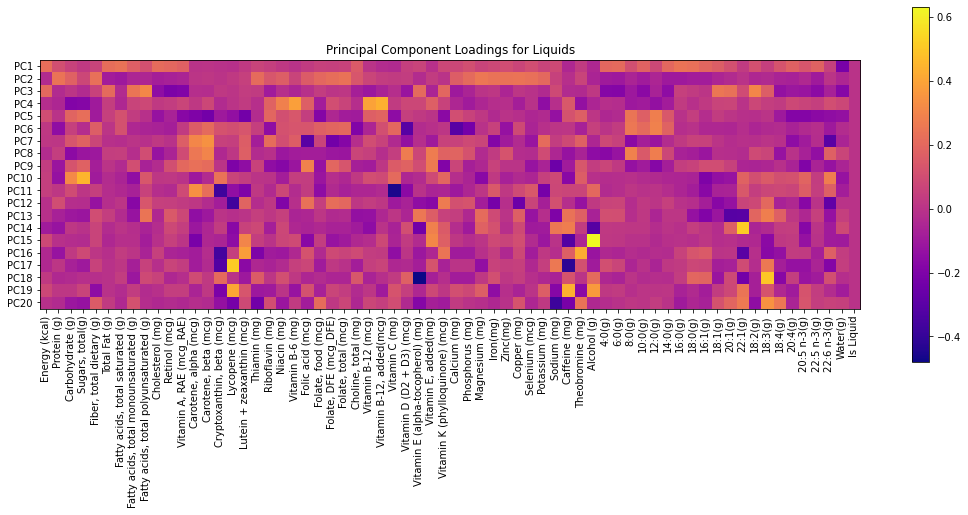

In [13]:
plot_PCA(nutrient_PCA())

In [14]:
feats = [x for x in feat_list if x not in ['Food code', 'WWEIA Category number', 'WWEIA Category description', 'Main food description']]

for ind, feat in enumerate(abs(nutrient_PCA().components_), start = 1):
    x = max(feat)
    max_index = list(feat).index(x)
    
    print(f'Most important feature for PC{ind}: {feats[max_index]} - {x * 100:.2f}% of component explained')

Most important feature for PC1: 16:0(g) - 24.40% of component explained
Most important feature for PC2: Magnesium (mg) - 25.62% of component explained
Most important feature for PC3: Fatty acids, total polyunsaturated (g) - 31.27% of component explained
Most important feature for PC4: Vitamin B-12, added(mcg) - 43.94% of component explained
Most important feature for PC5: 12:0(g) - 28.49% of component explained
Most important feature for PC6: Calcium (mg) - 30.93% of component explained
Most important feature for PC7: Carotene, beta (mcg) - 34.38% of component explained
Most important feature for PC8: Carotene, beta (mcg) - 30.11% of component explained
Most important feature for PC9: Folic acid (mcg) - 29.25% of component explained
Most important feature for PC10: Sugars, total(g) - 45.18% of component explained
Most important feature for PC11: Vitamin C (mg) - 45.26% of component explained
Most important feature for PC12: Lycopene (mcg) - 36.90% of component explained
Most important 

In [15]:
def pca_manifold(df):
    
    # get data
    data = scaled_nutrient_data(df)
    
    # perform PCA
    x_pca = PCA(n_components = 20, random_state = 0).fit_transform(data)
    
    return x_pca

In [16]:
pca_manifold(revised_df)

array([[-1.739e+00, -2.429e+00, -1.667e-01, ...,  4.579e-01,  1.002e+00,
        -2.602e-01],
       [-2.089e+00, -7.839e-01,  1.212e-01, ...,  2.087e-01,  1.121e-01,
         5.134e-01],
       [-2.357e+00, -1.790e+00,  2.202e-01, ..., -2.352e-02, -6.699e-02,
         3.417e-02],
       ...,
       [-1.830e-01,  1.263e-01, -1.048e+00, ...,  6.707e-02,  1.149e-01,
        -8.507e-02],
       [-6.447e-04,  5.090e-01, -9.880e-01, ...,  5.342e-02,  1.300e-01,
         3.204e-02],
       [ 1.859e-02,  2.937e-01, -1.269e+00, ...,  6.002e-02,  8.650e-02,
         1.095e-01]])

In [17]:
def kmeans_clusters(n_clusters):
    # get PCA output
    data = pca_manifold(revised_df)
    
    # perform clustering
    kmeans = KMeans(n_clusters = n_clusters, max_iter = 1000, random_state = 0)
    clusters = kmeans.fit_predict(data)
    
    return clusters

The average silhouette score for liquids with 2 clusters is: 0.6971584512797478
The average silhouette score for liquids with 3 clusters is: 0.37693195745711194
The average silhouette score for liquids with 4 clusters is: 0.3734705480457939
The average silhouette score for liquids with 5 clusters is: 0.2332851183882263


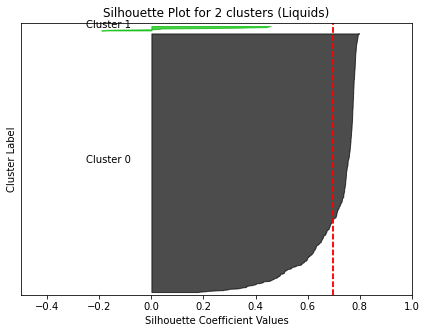

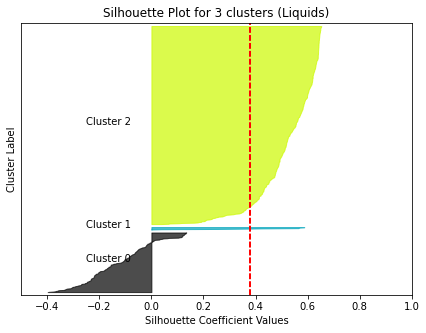

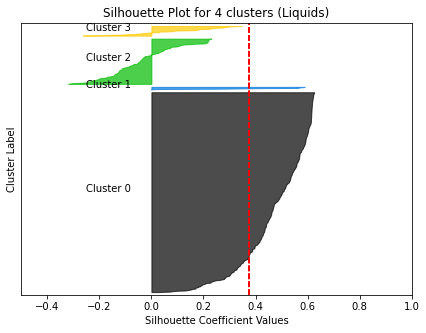

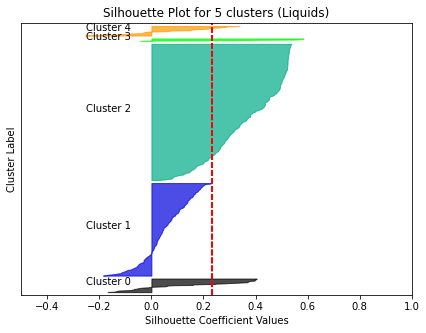

In [18]:
n_cluster_range = [2,3,4,5]

for n_clusters in n_cluster_range:
    # perform clustering
    pca_data = pca_manifold(revised_df)
    clus_labels = kmeans_clusters(n_clusters)
    
    fig, ax = plt.subplots(figsize = (7,5))
    ax.set_xlim([-0.5,1])
    ax.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])
    
    # average silhouette score for the dataset
    # a higher silhouette score relates to a model with better defined clusters (bounded between -1 and +1)
    sil_avg = silhouette_score(pca_data, clus_labels)

    # silhouette scores for each sample
    sample_sil_vals = silhouette_samples(pca_data, clus_labels)

    y_lower = 10
    for i in range(n_clusters):
        clus_vals = sample_sil_vals[clus_labels == i]
        clus_vals.sort()

        size_clus_i = clus_vals.shape[0]
        y_upper = y_lower + size_clus_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0,
                         clus_vals,
                         facecolor = color,
                         edgecolor = color,
                         alpha = 0.7
                        )

        ax.text(-0.25, y_lower + 0.5 * size_clus_i, f'Cluster {i}')

        y_lower = y_upper + 10

        # vertical line for average silhouette score of all of the values
        ax.axvline(x = sil_avg, color = 'red', linestyle = '--')

        # no y-axis / ticks
        ax.set_yticks([])
        ax.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        ax.set_title(f'Silhouette Plot for {n_clusters} clusters (Liquids)')
        ax.set_xlabel('Silhouette Coefficient Values')
        ax.set_ylabel('Cluster Label')
    print(f'The average silhouette score for liquids with {n_clusters} clusters is: {sil_avg}')
plt.show()

In [19]:
revised_df['cluster'] = kmeans_clusters(2)
revised_df.head()

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Retinol (mcg),"Vitamin A, RAE (mcg_RAE)","Carotene, alpha (mcg)","Carotene, beta (mcg)","Cryptoxanthin, beta (mcg)",Lycopene (mcg),Lutein + zeaxanthin (mcg),Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),Folic acid (mcg),"Folate, food (mcg)","Folate, DFE (mcg_DFE)","Folate, total (mcg)","Choline, total (mg)",Vitamin B-12 (mcg),"Vitamin B-12, added\n(mcg)",Vitamin C (mg),Vitamin D (D2 + D3) (mcg),Vitamin E (alpha-tocopherol) (mg),"Vitamin E, added\n(mg)",Vitamin K (phylloquinone) (mcg),Calcium (mg),Phosphorus (mg),Magnesium (mg),Iron\n(mg),Zinc\n(mg),Copper (mg),Selenium (mcg),Potassium (mg),Sodium (mg),Caffeine (mg),Theobromine (mg),Alcohol (g),4:0\n(g),6:0\n(g),8:0\n(g),10:0\n(g),12:0\n(g),14:0\n(g),16:0\n(g),18:0\n(g),16:1\n(g),18:1\n(g),20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g),Is Liquid,cluster
Main food description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcoholic coffee drink,88,0.21,2.10,2.04,0.0,2.38,1.355,0.497,0.105,7,22,22,0,0,0,0,0,0.013,0.064,0.135,0.003,0,2,2,2,2.8,0.00,0.0,0.0,0.1,0.07,0.0,0.3,5,7,2,0.02,0.04,0.007,0.2,40,3,27,0,8.3,0.049,0.040,0.025,0.060,0.072,0.226,0.622,0.212,0.044,0.529,0.004,0.000,0.050,0.008,0.000,0.004,0.001,0.001,0.0,86.66,1,0
Alcoholic malt beverage,58,0.90,0.27,0.00,0.0,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,0,0.030,0.090,1.100,0.090,0,18,18,18,10.1,0.02,0.0,0.0,0.0,0.00,0.0,0.0,8,32,12,0.03,0.01,0.008,0.6,62,4,0,0,7.7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,91.00,1,0
"Alcoholic malt beverage, sweetened",68,0.00,10.07,9.77,0.0,0.00,0.000,0.000,0.000,0,0,0,0,0,0,0,1,0.006,0.010,0.225,0.022,0,4,4,4,4.4,0.01,0.0,2.8,0.0,0.02,0.0,0.0,4,7,4,0.03,0.01,0.008,0.3,27,5,0,0,4.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,85.74,1,0
Alfredo sauce,150,2.12,1.77,0.90,0.0,15.00,8.523,3.125,0.622,44,136,137,0,6,0,0,0,0.011,0.074,0.022,0.013,0,2,2,2,6.4,0.07,0.0,0.2,0.5,0.30,0.0,1.3,66,50,4,0.02,0.29,0.008,2.7,39,552,0,0,0.0,0.318,0.256,0.159,0.373,0.440,1.395,3.932,1.355,0.251,3.250,0.026,0.001,0.363,0.055,0.001,0.023,0.004,0.008,0.0,79.37,1,0
Alfredo sauce with added vegetables,122,2.07,2.65,1.44,0.4,11.54,6.534,2.392,0.510,33,104,113,2,98,23,0,121,0.022,0.109,0.463,0.050,0,8,8,8,7.8,0.06,0.0,10.7,0.4,0.34,0.0,2.0,53,52,7,0.11,0.31,0.051,3.8,102,423,0,0,0.0,0.243,0.196,0.122,0.286,0.337,1.067,3.019,1.038,0.192,2.487,0.020,0.001,0.304,0.050,0.001,0.018,0.003,0.006,0.0,82.26,1,0


In [20]:
clus_0 = revised_df[revised_df['cluster'] == 0]
clus_1 = revised_df[revised_df['cluster'] == 1]

In [21]:
#clus_0.describe()

In [22]:
#clus_1.describe()

In [23]:
# Davies-Bouldin Score - siginifes average 'similarity' between clusters, where the similarity is a measure that compares
# distance between clusters with the size of the clusters themselves

# lower score relates to a model with a better partition
clus_labels = np.array(revised_df['cluster'])

db_score = davies_bouldin_score(pca_data, clus_labels)
db_score

0.9132519373499769

In [24]:
# Calinski-Harabasz Index - the ratio of the mean between-cluster dispersion and the inter-cluster dispersion for all 
# clusters (where dispersion is defined as the sum of distances squared)

# higher score relates to a model with better defined clusters
ch_score = calinski_harabasz_score(pca_data, clus_labels)
ch_score

164.3150355748007

In [25]:
junk_parameters = ['Energy (kcal)', 'Sodium (mg)', 'Sugars, total\n(g)', 'Total Fat (g)']

clus_0[junk_parameters].describe()

,Energy (kcal),Sodium (mg),"Sugars, total\n(g)",Total Fat (g)
count,942.0000,942.0000,942.0000,942.0000
mean,108.8885,138.2389,7.4765,5.6150
std,137.0140,296.0826,7.4947,14.0411
min,0.0000,0.0000,0.0000,0.0000
25%,40.0000,8.0000,1.4600,0.0800
50%,66.0000,36.0000,6.6500,1.1500
75%,125.7500,104.7500,10.3475,3.7675
max,900.0000,5843.0000,73.4000,100.0000


In [26]:
clus_1[junk_parameters].describe()

,Energy (kcal),Sodium (mg),"Sugars, total\n(g)",Total Fat (g)
count,17.0000,17.0000,17.0000,17.0000
mean,651.4118,424.6471,3.9706,69.8924
std,191.8538,476.7967,11.6893,23.9862
min,343.0000,0.0000,0.0000,33.4500
25%,499.0000,21.0000,0.0000,55.1000
50%,683.0000,450.0000,0.5800,75.3300
75%,750.0000,524.0000,0.7700,82.2000
max,902.0000,2039.0000,48.5400,100.0000
